# Konvoluční síť pro klasifikaci obrázků

Cílem tohoto cvičení je vytvoření jednoduché konvoluční sítě pro klasifikaci obrázků do 10 tříd.

## Dataset

Jedná se o datovou sadu 50 000 barevných tréninkových obrázků 32x32 a 10 000 testovacích obrázků označených v 10 kategoriích. 

Další informace naleznete na https://www.cs.toronto.edu/~kriz/cifar.html

## Třídy
- 0 	airplane
- 1 	automobile
- 2 	bird
- 3 	cat
- 4 	deer
- 5 	dog
- 6 	frog
- 7 	horse
- 8 	ship
- 9 	truck


# 1. Načtení datasetu

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Načtení dat pomocí vestavěné funkce
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [3]:
# Nastavení pojmenování tříd podle pořadí
class_names=["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
num_classes = len(class_names)

# 2. Průzkum dat

In [4]:
# Velikosti numpy polí
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert Y_train.shape == (50000, 1)
assert Y_test.shape == (10000, 1)

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


In [5]:
# Obrázek 32x32 pixelů
# 3 barvy
# Hodnoty 0 - 255
# Datový typ - uint8
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
# Kontrola výstupních dat
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


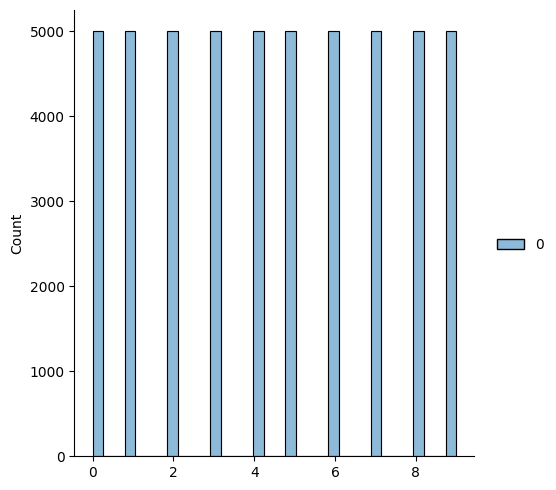

In [7]:
# Četnost tříd
sns.displot(Y_train)

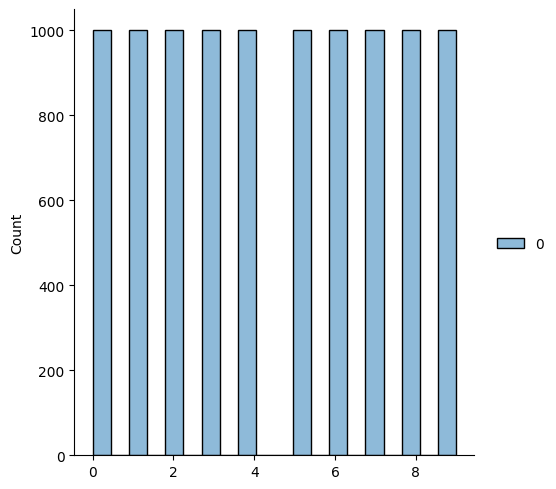

In [8]:
sns.displot(Y_test)

# 3. Vizualizace dat

In [9]:
def show_images (images, labels, rows=6, cols=10):
    """
     Metoda pro zobrazení náhledu obrázků
    """
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    plt.subplots_adjust(bottom=0)
    
    for idx in range (0, rows * cols):
        ridx=idx//cols
        cidx=idx % cols        
        ax= axes[ridx, cidx]
        ax.axis("off")
        ax.imshow(images[idx])
        label = class_names[labels[idx][0]]
        ax.set_title(f"{label}")        

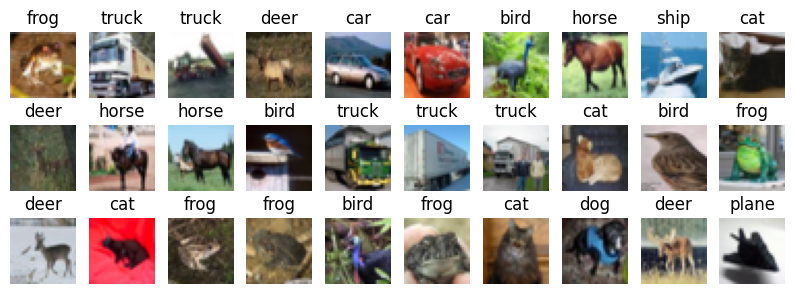

In [10]:
show_images(X_train, Y_train, 3, 10)

# 4. Příprava dat

In [11]:
# Převedení dat z int na float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
# Standardizace z rozsahu 0 - 255 na 0 - 1
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [13]:
# binární encoding kategorií
from keras.utils import to_categorical
num_classes = 10
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

In [14]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

# 5. Neuronová síť

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input

In [16]:
model = Sequential()

# input_shape - Vstupní rozměry - 32 x 32 x 3
# filters     - 32 konvolučních filtrů
# kernel_size - velikost konvolučních filtrů 3 x 3
# padding     - zarovnání same vede k rovnoměrnému vyplňování vlevo/vpravo nebo nahoru/dolů od vstupu
# activation  - aktivační funkce ReLU
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))

# Maxpooling, velikost pool je 2 x 2
model.add(MaxPooling2D(pool_size=(2,2)))

# Vrstva Dropout náhodně nastavuje vstupní neurony na 0, což pomáhá zabránit nadměrnému přizpůsobení sítě trénovacím datům
# Vstupy, které nejsou nastaveny na 0, se škálují o 1 / (1 - rate) tak, aby se součet všech vstupů nezměnil.
model.add(Dropout(0.3))

# Druhy blok konvolučních vrstev
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Třetí blok konvolučních vrstev
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Převedení více rozměrné mapy příznaků na 1 rozměrový vektor
model.add(Flatten())

# Klasifikační část s plně propojenými vrstvami s aktivačními funkce relu a softmax
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))    # num_classes = 10

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from keras_visualizer import visualizer 
visualizer(model, file_format='png', view=True)

ValueError: [Keras Visualizer] Error while visualizing: <class 'Exception'>

In [19]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

# 6. Učení

In [20]:
# zastavení učení, když se val_loss nebude příliš měnit
early_stop = keras.callbacks.EarlyStopping(monitor='accuracy', patience=30)

In [21]:
# trénování modelu
history = model.fit(X_train, Y_train, batch_size=64, epochs=15, callbacks=[early_stop])

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 58ms/step - accuracy: 0.2372 - loss: 2.0126
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.4674 - loss: 1.4614
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.5444 - loss: 1.2846
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.5769 - loss: 1.1829
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.6108 - loss: 1.0977
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.6267 - loss: 1.0562
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.6479 - loss: 0.9927
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.6589 - loss: 0.9645
Epoch 9/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.6747 - loss: 0.9315
Epoch 10/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.6865 - loss: 0.8996
Epoch 11/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.6937 - loss: 0.8672
Epoch 12/15
782/782 ━━━━━━━━━━

In [22]:
# Uložení modelu
model.save('classification_model_cifar10.keras')

# 7. Historie učení

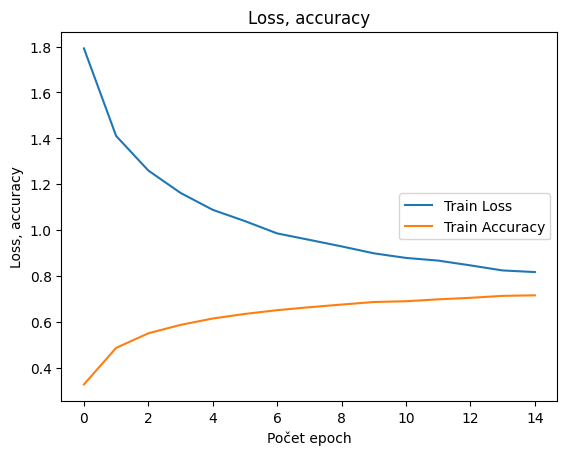

In [23]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.legend(loc="right")
plt.title('Loss, accuracy')
plt.ylabel('Loss, accuracy')
plt.xlabel('Počet epoch')
plt.show()

# 8. Ověření modelu

In [24]:
model = keras.models.load_model('classification_model_cifar10.keras')

In [25]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [26]:
Y_pred[0]

array([2.5589351e-04, 6.2502164e-05, 6.3062212e-03, 7.1805555e-01,
       2.6232161e-04, 2.3318996e-01, 1.3576447e-02, 3.8028407e-04,
       2.7778959e-02, 1.3184486e-04], dtype=float32)

In [27]:
Y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [28]:
# Výběr třídy podle nejvýšší pravděpodobnosti
Y_pred_best_answer = np.argmax(Y_pred, axis=-1)
Y_pred_best_answer

array([3, 8, 8, ..., 5, 1, 7])

In [29]:
# totéž provedeme s testovacími odpovědmi (realita)
# ideálně se obě pole rovnají
Y_test_best_answer=np.argmax(Y_test, axis=-1)
Y_test_best_answer

array([3, 8, 8, ..., 5, 1, 7])

<Axes: >

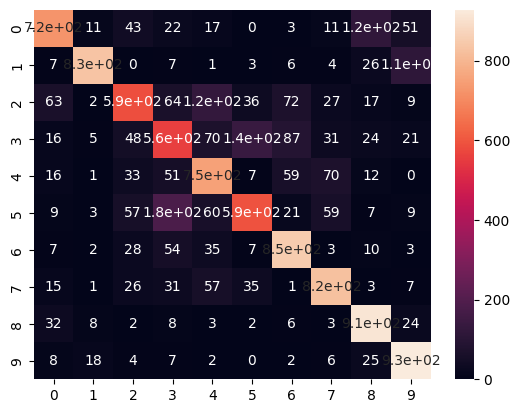

In [30]:
# Vykreslení confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cf_matrix=confusion_matrix(Y_test_best_answer, Y_pred_best_answer)
sns.heatmap(cf_matrix, annot=True)

In [31]:
# R2 skóre pro nejlepší odpovědi
from sklearn.metrics import r2_score
r2 = r2_score(Y_test_best_answer, Y_pred_best_answer)
print('R2 score: {}'.format(r2))

R2 score: 0.48802424242424247


In [32]:
# Ztrátová funkce a přesnost modelu
scores = model.evaluate(X_test, Y_test, verbose=0)
print (f"Loss function: {scores[0]}")
print (f"Accuracy: {scores[1]}")

Loss function: 0.7065027356147766
Accuracy: 0.7558000087738037


In [33]:
# Zobrazení přesnosti pro jednotlivé třídy
class_correct, class_count = [0]*10, [0]*10

for i in range(Y_test.shape[0]):    
    if (Y_test_best_answer[i] == Y_pred_best_answer[i]):
        class_correct[Y_test_best_answer[i]] +=1
    class_count[Y_test_best_answer[i]] += 1
    
for i in range(10):
    print (f"Přesnost pro {class_names[i]}: {class_correct[i]/class_count[i]:.2%}") 

Přesnost pro plane: 72.30%
Přesnost pro car: 83.30%
Přesnost pro bird: 58.60%
Přesnost pro cat: 55.80%
Přesnost pro deer: 75.10%
Přesnost pro dog: 59.20%
Přesnost pro frog: 85.10%
Přesnost pro horse: 82.40%
Přesnost pro ship: 91.20%
Přesnost pro truck: 92.80%


In [34]:
def show_wrong_predictions(X_test, Y_test, Y_pred, rows=5, cols=5):    
    """ Zobrazení špatných odpovědí """
    idx = 0
    max_examples = rows * cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows), constrained_layout=True)    
    for i in range(Y_test.shape[0]):    
        if (Y_test[i] != Y_pred[i]):                                    
            ridx=idx // cols
            cidx=idx % cols            
            ax = axes[ridx, cidx]
            ax.axis("off")
            ax.imshow(X_test[i].reshape(32,32,3), cmap="gray_r")
            ax.set_title(f"{class_names[Y_test[i]]} != {class_names[Y_pred[i]]}")
            idx +=1
            if (idx == max_examples):
                break

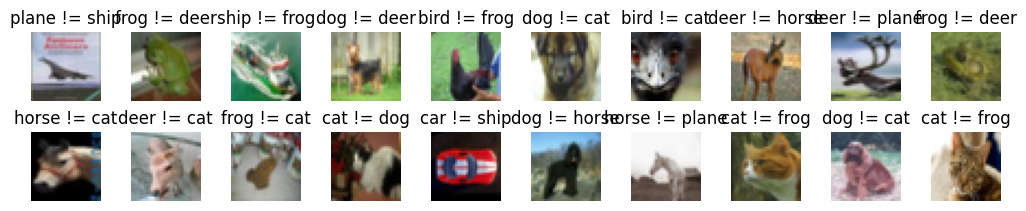

In [35]:
# zobrazení špatných předpovědí
show_wrong_predictions(X_test, Y_test_best_answer, Y_pred_best_answer, 2, 10)